In [49]:
import torch 
import numpy as np 
import matplotlib.pyplot as plt
import random

In [2]:
words = open("words.txt", "r").readlines()
words = [w.replace("\n","") for w in words]
words[:3]

['a', 'abaca', 'abache']

In [56]:
characters = set("".join(words))
characters.add(".")
characters = sorted(list(characters))
stoi ={f"{c}": i for i, c in enumerate(characters)}
itos ={v: k for k, v in stoi.items()}

In [57]:
start_end = "."
block_size = 3 

# bulding dataset for training, validation and testing

def bulding_data(words):
    X = []
    y = []
    for word in words:
        context = [0] * block_size
        # print(word)
        for c in word + start_end:
            ix = stoi[c]
            X.append(context)
            y.append(ix)
            # print("".join(itos[chx] for chx in context), "->", itos[ix])
            context = context[1:] + [ix]
    X = torch.tensor(X)
    y = torch.tensor(y)
    return X, y

random.seed(42)
random.shuffle(words)
n1, n2 = int(len(words)*0.8), int(len(words)*0.9)
Xtr, ytr = bulding_data(words[:n1])
Xval, yval = bulding_data(words[n1:n2])
Xts, yts = bulding_data(words[n2:])

In [170]:
# MLP
g = torch.Generator().manual_seed(42)

# Create embeddings (if we add one more column => loss will decrese)
C = torch.randn((27, 2))

# create parameters for MLP
W1 = torch.randn((6, 300), generator=g)
b1 = torch.randn((300), generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
elements = []
for p in parameters:
   elements.append(p.nelement())
print("number of parameters: %d" %sum(elements))

number of parameters: 10281


In [171]:
for p in parameters:
    p.requires_grad = True

In [153]:
# finding best learning rate
lre = torch.linspace(-3, 0, 1000)
lr = 10 ** lre # lre are the learning rates exponents


In [154]:
from torch.nn.functional import cross_entropy

lri = []
lossi = []

for i in range(1000):
    ix = torch.randint(0, Xtr.shape[0], (32,))
    batch = C[Xtr[ix]].view(-1, 6)
    
    # forward
    x = batch @ W1 + b1 # shape (32, 100)
    x = torch.tanh(x)
    x = x @ W2 + b2 # shape (32, 27)
    
    loss = cross_entropy(x, ytr[ix])
    
    # backward
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -lr[i] * p.grad
    
    lri.append(lre[i])
    lossi.append(loss.item())  
       
print(loss.item())

7.440858840942383


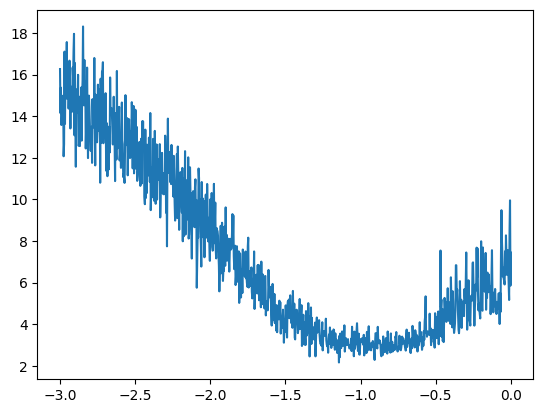

In [155]:
plt.plot(lri, lossi)

In [172]:
# from the graph above wer can see the a good initial lr is 0.1
lossi = []
steps = []
lossi_val = []

from torch.nn.functional import cross_entropy

for i in range(200000):
    ix = torch.randint(0, Xtr.shape[0], (64,))
    ix_val = torch.randint(0, Xval.shape[0], (64,))
    batch = C[Xtr[ix]].view(-1, 6)
    batch_val = C[Xval[ix_val]].view(-1, 6)
    
    # forward
    x = batch @ W1 + b1 # shape (64, 300)
    x = torch.tanh(x)
    x = x @ W2 + b2 # shape (64, 27)
    
    loss = cross_entropy(x, ytr[ix])
    
    #validation
    x_val = batch_val @ W1 + b1 # shape (64, 300)
    x_val = torch.tanh(x_val)
    x_val = x_val @ W2 + b2 # shape (64, 27)
    
    loss_val = cross_entropy(x_val, yval[ix_val])
    
    # backward
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    # lr decay
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    
    lossi.append(loss.item())
    steps.append(i)
    lossi_val.append(loss_val.item())
    
print("loss in last step of training:", loss.item())


loss in last step of training: 1.8212788105010986


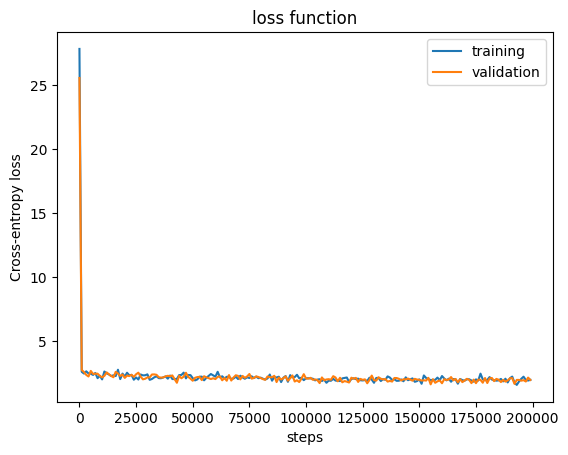

In [183]:
plt.title("loss function")
plt.plot(steps[0::1000], lossi[0::1000], label="training")
plt.plot(steps[0::1000], lossi_val[0::1000], label="validation")
plt.xlabel("steps")
plt.ylabel("Cross-entropy loss")
plt.legend()

In [175]:
batch = C[Xts].view(-1, 6)
# forward
x = batch @ W1 + b1 # shape (len(Xval), 100)
x = torch.tanh(x)
x = x @ W2 + b2 # shape (len(Xval), 27)

loss = cross_entropy(x, yts)
print("loss in test set:", loss.item())

loss in validation: 2.012885808944702


In [209]:
from torch.nn.functional import softmax
g = torch.Generator().manual_seed(98)
for _ in range(20):
    start = [0]*block_size
    out = []
    while True:
        emb = C[start].view(-1, 6)
        x = emb @ W1 + b1 
        x = torch.tanh(x)
        x = x @ W2 + b2
        probs = softmax(x, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        out.append(itos[ix])
        start = start[1:] + [ix]
        if ix == 0:
            break
    print("".join(out))

tere.
pita.
trifiti.
verate.
pattolinatuture.
posse.
combo.
anti.
treggiavattrino.
inucche.
armenio.
osporfusti.
turentenau.
gepposcitistino.
eveggiaticceste.
agghageno.
ridita.
attravacti.
ubievanno.
pruspurettavate.
